In [258]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [259]:
past_data=pd.read_csv('INNHotelsGroup_pastdata.csv')
new_data=pd.read_csv('INNHotelsGroup_newdata.csv')

In [260]:
past_data.shape
past_data.head().columns

Index(['booking_id', 'lead_time', 'market_segment_type',
       'no_of_special_requests', 'avg_price_per_room', 'no_of_adults',
       'no_of_weekend_nights', 'arrival_date', 'required_car_parking_space',
       'no_of_week_nights', 'booking_status', 'rebooked'],
      dtype='object')

In [261]:
new_data.shape

(3583, 11)

In [262]:
new_data.head().columns

Index(['booking_id', 'lead_time', 'market_segment_type',
       'no_of_special_requests', 'avg_price_per_room', 'no_of_adults',
       'no_of_weekend_nights', 'arrival_date', 'required_car_parking_space',
       'no_of_week_nights', 'booking_status'],
      dtype='object')

## descriptive statistics

In [263]:
past_data.describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,27093.0,81.605249,84.901428,0.0,14.0,55.0,118.0,443.0
no_of_special_requests,27093.0,0.556454,0.743715,0.0,0.0,0.0,1.0,5.0
avg_price_per_room,27093.0,101.025910,34.557289,0.0,79.0,97.0,119.0,540.0
no_of_adults,27093.0,1.825822,0.512182,0.0,2.0,2.0,2.0,4.0
no_of_weekend_nights,27093.0,0.778319,0.861787,0.0,0.0,1.0,1.0,6.0
required_car_parking_space,27093.0,0.028864,0.167426,0.0,0.0,0.0,0.0,1.0
no_of_week_nights,27093.0,2.171373,1.386023,0.0,1.0,2.0,3.0,17.0


In [264]:
past_data.describe(include='object').T

,count,unique,top,freq
booking_id,27093,27093,INNHG_101034,1
market_segment_type,27093,2,Online,18456
arrival_date,27093,439,2021-03-19,279
booking_status,27093,2,Not Canceled,18236
rebooked,8857,2,No,7092


<Axes: >

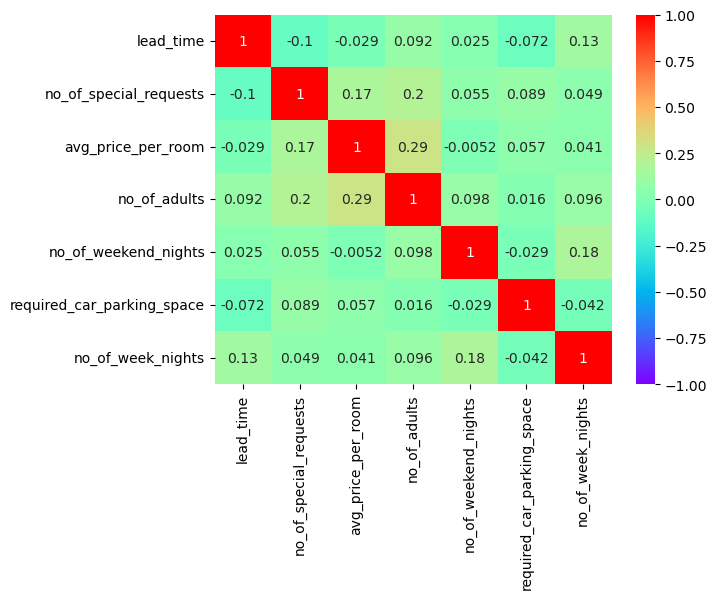

In [265]:
## correlation ----heatmap
sns.heatmap(past_data.corr(numeric_only=True),annot=True,vmax=1,vmin=-1,cmap='rainbow')

In [266]:
# we need to assign correct data types to columns by dtypes or info 
past_data.dtypes

booking_id                     object
lead_time                       int64
market_segment_type            object
no_of_special_requests          int64
avg_price_per_room            float64
no_of_adults                    int64
no_of_weekend_nights            int64
arrival_date                   object
required_car_parking_space      int64
no_of_week_nights               int64
booking_status                 object
rebooked                       object
dtype: object

In [267]:
# arrival data is correctly mentioned therefore need to convert it into data data type
# for that we need to combine both of the data pst and new data 

In [268]:
actual_y=new_data['booking_status']

In [269]:
new_data.drop(columns=['booking_status'],inplace=True)

In [270]:
new_data.head()

,booking_id,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights
0,INNHG_128127,4,Online,1,103.00,1,0,2022-07-01,1,1
1,INNHG_128128,147,Online,2,103.70,2,2,2022-07-01,0,2
2,INNHG_128129,43,Online,1,126.90,2,1,2022-07-01,1,2
3,INNHG_128130,145,Offline,0,72.76,2,0,2022-07-01,0,1
4,INNHG_128131,86,Offline,1,107.69,2,1,2022-07-01,0,2


In [271]:
data=pd.concat([past_data,new_data],axis=0)


In [272]:
data.head()

,booking_id,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status,rebooked
0,INNHG_101034,0,Online,0,85.03,1,1,2021-01-01,0,0,Not Canceled,NaN
1,INNHG_101035,34,Online,2,125.10,2,2,2021-01-01,0,0,Not Canceled,NaN
2,INNHG_101036,24,Online,1,71.69,2,2,2021-01-01,0,0,Not Canceled,NaN
3,INNHG_101037,23,Online,0,84.70,1,2,2021-01-01,0,0,Not Canceled,NaN
4,INNHG_101038,46,Online,1,149.40,2,2,2021-01-01,0,3,Canceled,No


In [273]:
# change the data types of arrival data to datatime
data['arrival_date']=pd.to_datetime(data['arrival_date'],format='%Y-%m-%d')

In [274]:
data.dtypes

booking_id                            object
lead_time                              int64
market_segment_type                   object
no_of_special_requests                 int64
avg_price_per_room                   float64
no_of_adults                           int64
no_of_weekend_nights                   int64
arrival_date                  datetime64[ns]
required_car_parking_space             int64
no_of_week_nights                      int64
booking_status                        object
rebooked                              object
dtype: object

In [275]:
## data['arrival_date'].dt.weekday.value_counts()                    # using this we can separate the date into day,month,year
## data['arrival_date'].dt.isocalendar()

In [276]:
data['arrival_day']=data['arrival_date'].dt.day
data['arrival_month']=data['arrival_date'].dt.month
data['arrival_weekday']=data['arrival_date'].dt.weekday



In [277]:
data.head(3)

,booking_id,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status,rebooked,arrival_day,arrival_month,arrival_weekday
0,INNHG_101034,0,Online,0,85.03,1,1,2021-01-01,0,0,Not Canceled,NaN,1,1,4
1,INNHG_101035,34,Online,2,125.10,2,2,2021-01-01,0,0,Not Canceled,NaN,1,1,4
2,INNHG_101036,24,Online,1,71.69,2,2,2021-01-01,0,0,Not Canceled,NaN,1,1,4


In [278]:
data.tail(3)

,booking_id,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status,rebooked,arrival_day,arrival_month,arrival_weekday
3580,INNHG_131707,185,Online,2,116.10,2,2,2022-09-29,0,3,NaN,NaN,29,9,3
3581,INNHG_131708,214,Online,0,120.90,2,0,2022-09-29,0,3,NaN,NaN,29,9,3
3582,INNHG_131709,193,Online,1,93.09,2,0,2022-09-29,0,3,NaN,NaN,29,9,3


In [279]:
# drop booking id and arrival date
data.drop(columns=['arrival_date','booking_id'],inplace=True)

In [280]:
data.head(3)

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,booking_status,rebooked,arrival_day,arrival_month,arrival_weekday
0,0,Online,0,85.03,1,1,0,0,Not Canceled,NaN,1,1,4
1,34,Online,2,125.10,2,2,0,0,Not Canceled,NaN,1,1,4
2,24,Online,1,71.69,2,2,0,0,Not Canceled,NaN,1,1,4


## data analysis

In [281]:
data.columns

Index(['lead_time', 'market_segment_type', 'no_of_special_requests',
       'avg_price_per_room', 'no_of_adults', 'no_of_weekend_nights',
       'required_car_parking_space', 'no_of_week_nights', 'booking_status',
       'rebooked', 'arrival_day', 'arrival_month', 'arrival_weekday'],
      dtype='object')

In [282]:
num_col=['lead_time','avg_price_per_room','arrival_day',]
cat_col=['market_segment_type','no_of_special_requests',
         'no_of_week_nights','rebooked','arrival_month',
         'arrival_weekday','booking_status','no_of_adults',
         'required_car_parking_space']

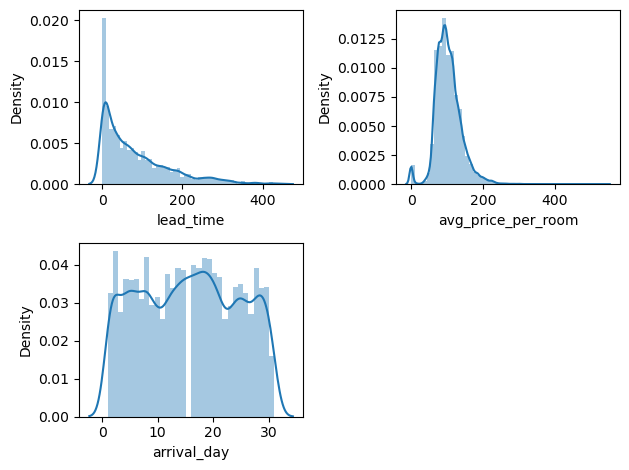

In [283]:
# univariate analysis 
t=1
for i in num_col:
    plt.subplot(2,2,t)
    sns.distplot(data[i])
    t+=1
plt.tight_layout()
plt.show()

In [284]:
## arrival day is 0 on 15 
## avg prive is 0


In [285]:
plt.title

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

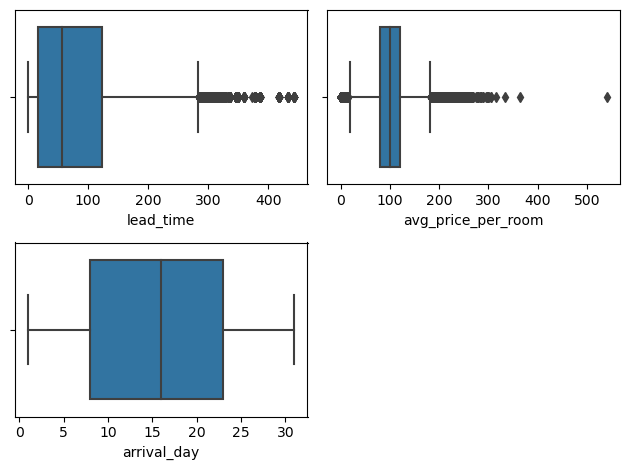

In [286]:
# boxplot for outliers 
t=1
for i in num_col:
    plt.subplot(2,2,t)
    sns.boxplot(x=data[i],orient='h')
    t+=1
plt.tight_layout()
plt.show()

In [287]:
# why some avg price per room are above 500

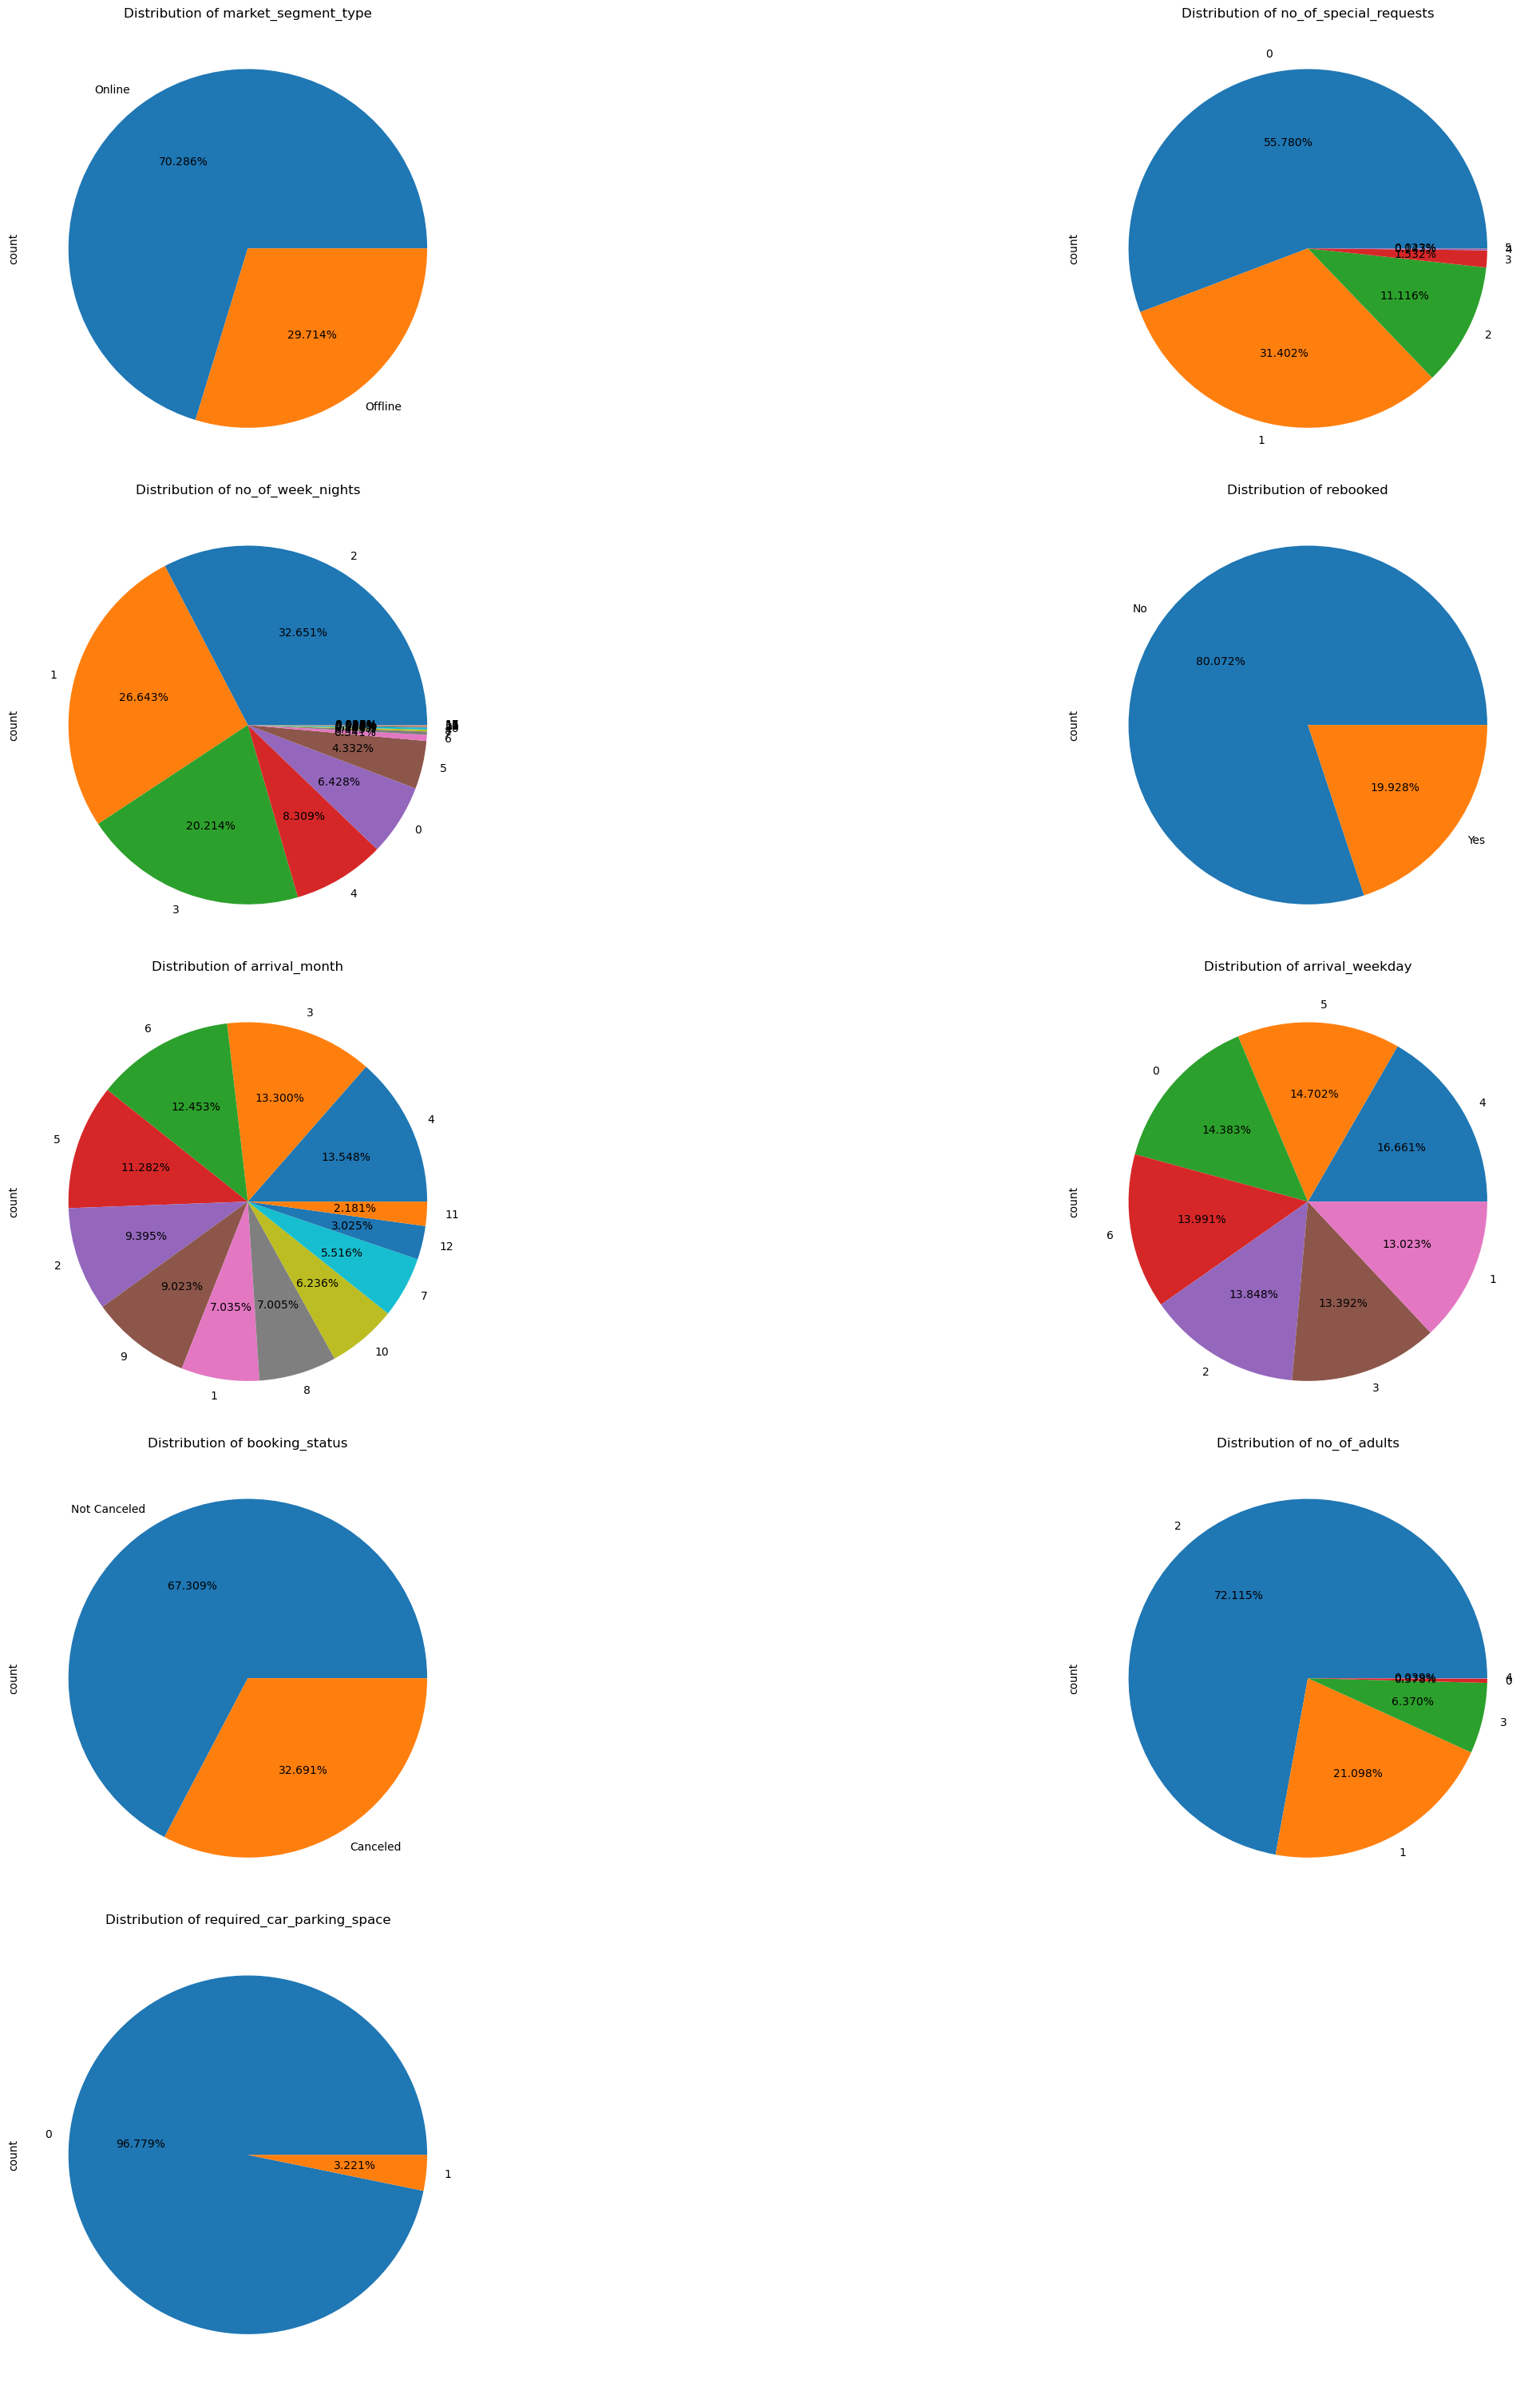

In [288]:
# distribution for categorical column in univariate analysis
t=1
plt.figure(figsize=(30,30))
for i in cat_col:
    plt.subplot(5,2,t)
    data[i].value_counts().plot(kind='pie',autopct='%.3f%%')
    plt.title(f'Distribution of {i}')
    t+=1
plt.tight_layout()
plt.show()



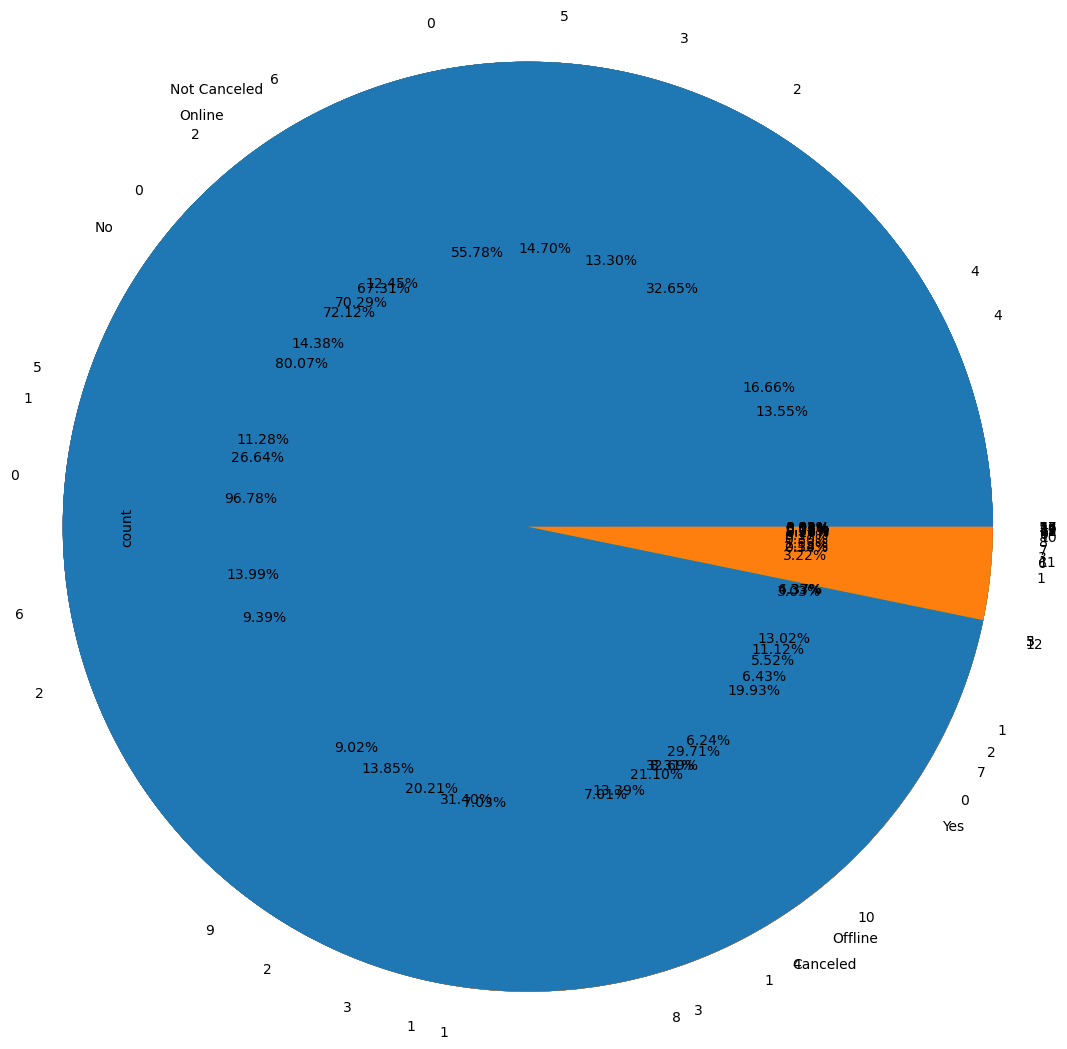

In [289]:
# or we can do it like 
plt.figure(figsize=(10,20))
for i in cat_col:
    data[i].value_counts().plot(kind='pie',autopct='%.2f%%',radius=1.5)

plt.show()

In [290]:
# there are few booking where lead time are greater than 300.
# there are few bookings where avg price per room is 0 
# and for some room these avg price are greater than 300 
# most of the booking (70%)  made online
# most of customer eithere have one special request or none
# most of the room have been booked for either couples or single occupence
# most of the customer are spending 0 ,1 or 2 weekend nights
# approx 97 % of the booking does not require parking space
# most of the booking are spending 1,2, or 3 week nights.
# most of the booking cancellation rate is approc 33% 


In [291]:
# explore rebooked data
data.groupby(by=['booking_status','rebooked'])['rebooked'].count()


booking_status  rebooked
Canceled        No          7092
                Yes         1765
Name: rebooked, dtype: int64

In [292]:
data['rebooked'].value_counts(normalize=True)

rebooked
No     0.800723
Yes    0.199277
Name: proportion, dtype: float64

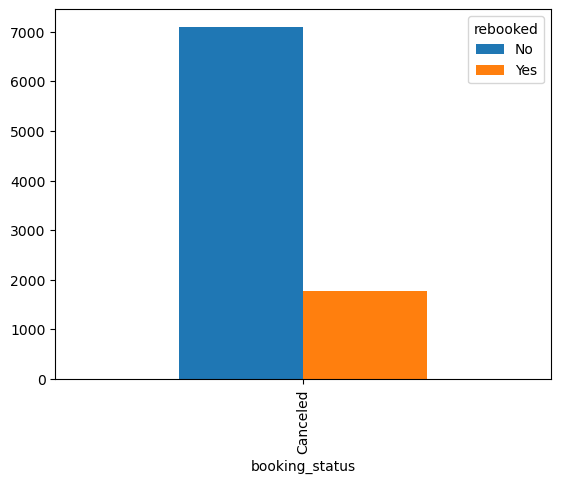

In [293]:
# or 
pd.crosstab(data['booking_status'],data['rebooked']).plot(kind='bar')
plt.show()

In [294]:
# out of 33 % cancellation ,80% were not reeboked this brings huge loss to companies 
# this is majorly because cancellation have been made at the last minute.
# we can address this problem by making a prediction about cancellation way before time.

# bivariate analysis 

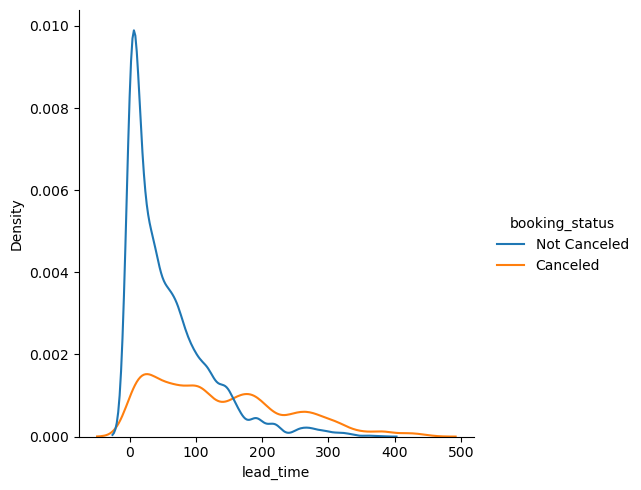

In [295]:
# num vs cat
sns.displot(x=data['lead_time'],kind='kde',hue=data['booking_status'])

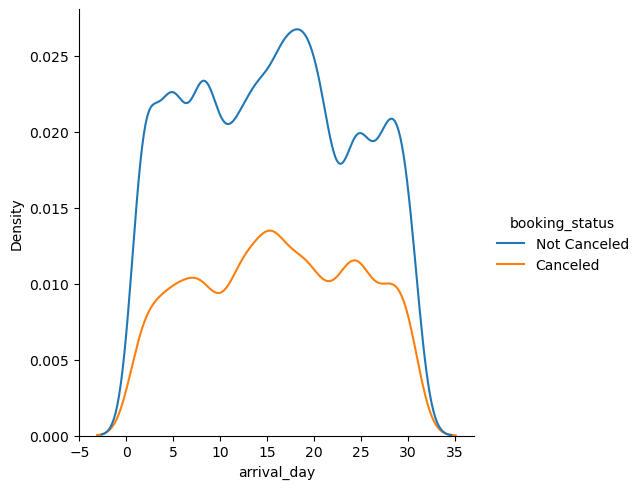

In [296]:
sns.displot(x=data['arrival_day'],kind='kde',hue=data['booking_status'])

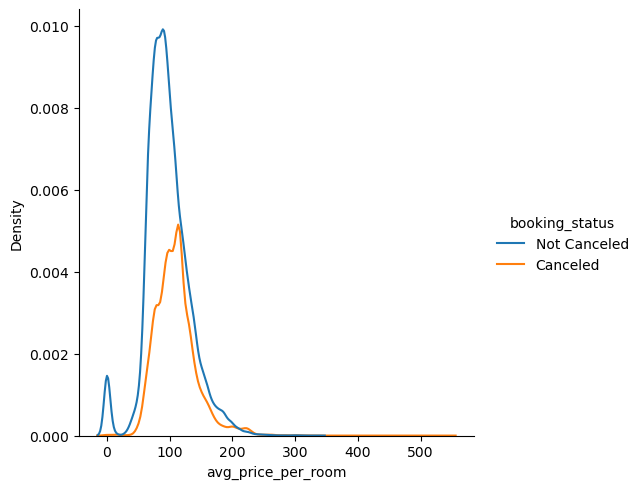

In [297]:
sns.displot(x=data['avg_price_per_room'],kind='kde',hue=data['booking_status'])

In [298]:
# cat vs cat
cat_col

['market_segment_type',
 'no_of_special_requests',
 'no_of_week_nights',
 'rebooked',
 'arrival_month',
 'arrival_weekday',
 'booking_status',
 'no_of_adults',
 'required_car_parking_space']

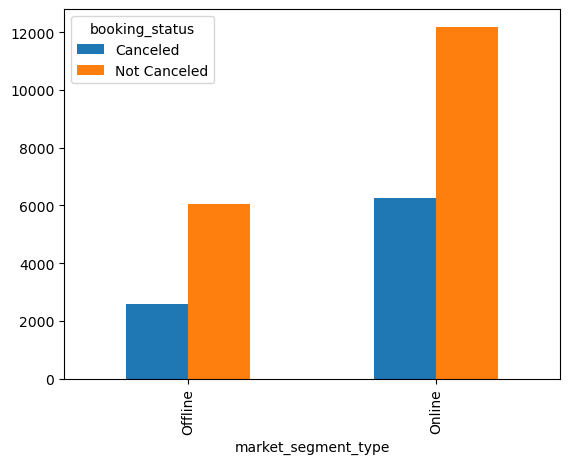

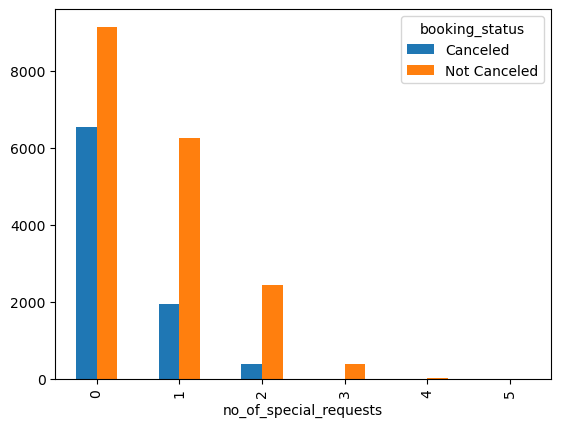

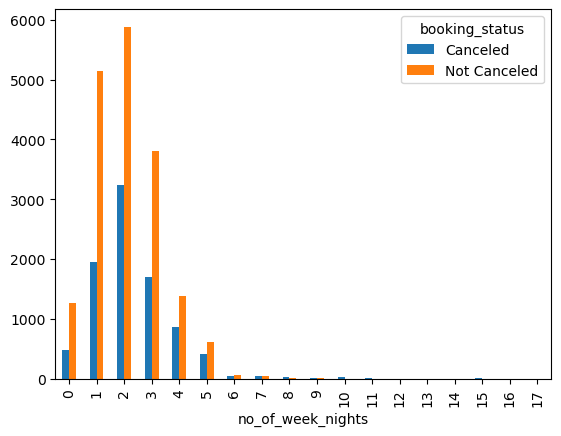

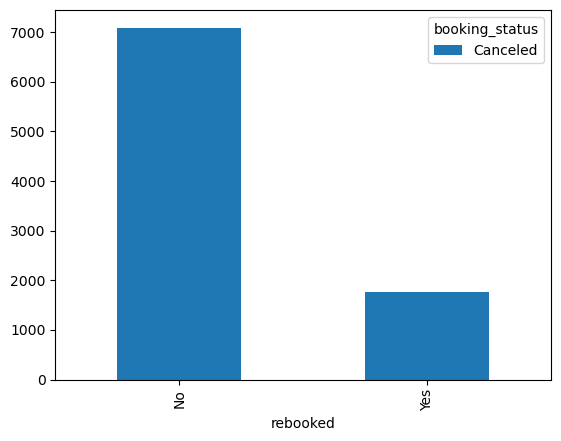

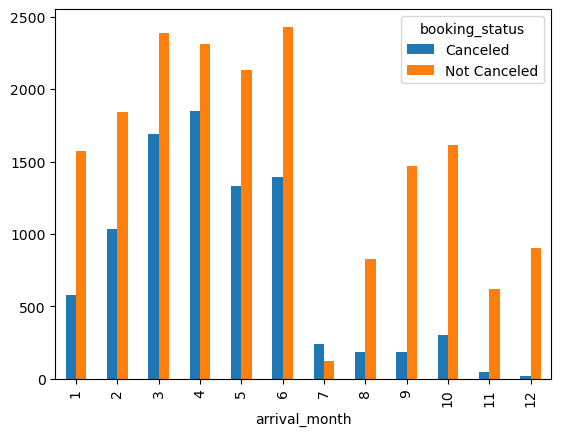

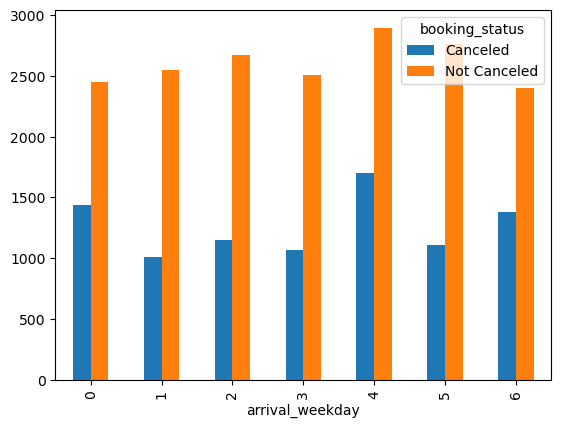

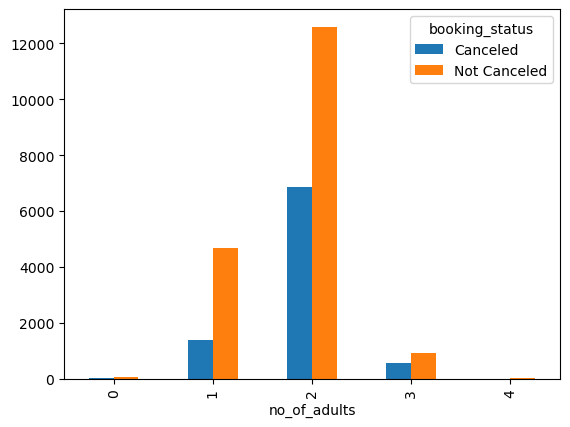

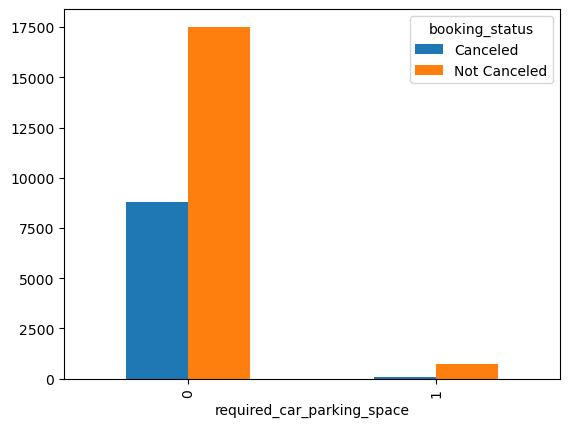

In [299]:
# grouped bar plot
for i in cat_col:
    if i!='booking_status':
        pd.crosstab(data[i],data['booking_status']).plot(kind='bar')
        plt.show()

In [300]:
# inference 
# no of cancelation is highest when special req is 0
# those who does not req car parking ,cabncellation rate is low
#most of cance;lation made on thrusday


### statistical analysis(inferential statistics)

In [301]:
# num vs cat
num_col      

['lead_time', 'avg_price_per_room', 'arrival_day']

In [302]:
import scipy.stats as stats

In [303]:
# two sample ttest/Mannehitneyu
# ho-there is no relation between num col and booking status(Mu1=MU2)
# ha=there is relation between num col amd booking status.(u1!=Mu2)

# if there are 2 categories use two sample test
# if more than 2 use annova test

In [304]:
# assumptions (normality)
# ho -data normal
# ha- data not normak
print(stats.shapiro(data['lead_time']))
print(stats.shapiro(data['avg_price_per_room']))
print(stats.shapiro(data['arrival_day']))

# if  pvalue < alpha-data is not normal
# here povalue is 0 there data is normal

ShapiroResult(statistic=0.858092188835144, pvalue=0.0)
ShapiroResult(statistic=0.9544830918312073, pvalue=0.0)
ShapiroResult(statistic=0.9567803740501404, pvalue=0.0)


In [305]:
for i in num_col:
    samp1=data[data['booking_status']=='Not Canceled'][i]
    samp2=data[data['booking_status']=='Canceled'][i]
    print(stats.mannwhitneyu(samp1,samp2))

MannwhitneyuResult(statistic=40528570.5, pvalue=0.0)
MannwhitneyuResult(statistic=61814361.0, pvalue=4.950381137183313e-216)
MannwhitneyuResult(statistic=77648486.5, pvalue=2.5710270847504093e-07)


In [306]:
# all the pvalues are less than 0.05 hence we reject Ho

In [307]:
# cat vs cat 
#ho- categories have no relation
# ha- categories have relation

for i in cat_col:
    if i !='booking_status':
        table=pd.crosstab(data[i],data['booking_status'])
        print(i,':',stats.chi2_contingency(table)[1])

market_segment_type : 7.806389643886697e-11
no_of_special_requests : 0.0
no_of_week_nights : 7.318602549508705e-65
rebooked : 1.0
arrival_month : 0.0
arrival_weekday : 2.0528217585454624e-36
no_of_adults : 1.4411855115006094e-73
required_car_parking_space : 5.626905783478662e-49


In [308]:
# rebooked is 1 this means there is no relation with categories 
# except rebooked all other categories are showing some sort of significance relation with taget columns.

## data precossing 

In [309]:
# we can not include rebooking feature/column in a model as this information is only available when the booking has been
# cancelled which we have to predict.
data.drop(columns=['rebooked'],inplace=True)

In [310]:
data.head()

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,booking_status,arrival_day,arrival_month,arrival_weekday
0,0,Online,0,85.03,1,1,0,0,Not Canceled,1,1,4
1,34,Online,2,125.10,2,2,0,0,Not Canceled,1,1,4
2,24,Online,1,71.69,2,2,0,0,Not Canceled,1,1,4
3,23,Online,0,84.70,1,2,0,0,Not Canceled,1,1,4
4,46,Online,1,149.40,2,2,0,3,Canceled,1,1,4


# check for missing values


In [311]:
data.isnull().sum()

lead_time                        0
market_segment_type              0
no_of_special_requests           0
avg_price_per_room               0
no_of_adults                     0
no_of_weekend_nights             0
required_car_parking_space       0
no_of_week_nights                0
booking_status                3583
arrival_day                      0
arrival_month                    0
arrival_weekday                  0
dtype: int64

In [312]:
new_data.shape

(3583, 10)

In [313]:
# there are no missing values 


# outliers  treatment

In [314]:
train=data[data['booking_status'].notnull()]
test=data[data['booking_status'].isnull()]

In [315]:
train.shape

(27093, 12)

In [316]:
test.shape

(3583, 12)

In [317]:
# remove/capping the outliers 
for i in num_col:
    q1,q3=np.quantile(train[i],[0.25,0.75])
    iqr=q3-q1
    ul,ll=q3+2.5*iqr,q1-2.5*iqr                   # seeting whisker length to 2.5 for removing only extreme outliers 
    train[i]=np.where(train[i]>ul,ul,train[i])
    train[i]=np.where(train[i]<ll,ll,train[i])
    

In [ ]:
t=1
for i in num_col:
    plt.subplot(2,2,t)
    sns.boxplot(x=train[i])
    t+=1
plt.tight_layout()
plt.show()

# outliers has been removed 

## encoding

In [ ]:
train.head()

In [ ]:
train

In [ ]:
# instead of this we can also use mapping 
train['booking_status']=train['booking_status']\
.map({'Canceled':1,'Not Canceled':0})


In [ ]:
train=pd.get_dummies(train,drop_first=True,dtype=int)
test=pd.get_dummies(test,drop_first=True,dtype=int)

In [ ]:
test.shape

In [ ]:
train.shape

# train test split

In [ ]:
x_test=test
y_test=actual_y.map({'Canceled':1,'Not Canceled':0})

x_train=train.drop(columns=['booking_status'])
y_train=train['booking_status']

In [ ]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

# predictive modeling 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier,StackingClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,cohen_kappa_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
pip install xgboost

In [ ]:
mod=[]
accuracy=[]
prec=[]
recall=[]
f1=[]
kohan_cappa=[]

def model_validation(model,xtrain,ytrain,xtest,ytest):
    m=model
    m.fit(xtrain,ytrain)
    pred_h=m.predict(xtest)
    pred_s=m.predict_proba(xtest)[:,1]
    
    print('confusion matrix\n',confusion_matrix(ytest,pred_h))
    print('classification report\n',classification_report(ytest,pred_h))
    
    fpr,tpr,thresh=roc_curve(ytest,pred_s)
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,10],ls="--",color='red')
    plt.title(f'ROC AUC {round(roc_auc_score(ytest,pred_s),2)}')
    plt.show()
    
    response=input('do you want to save the model Y/N') 
    if response.lower()=='y':
        
        global scorecard                           # global means i can call it outside the function also
        mod.append(str(model))
        accuracy.append(accuracy_score(ytest,pred_h))
        recall.append(recall_score(ytest,pred_h))
        prec.append(precision_score(ytest,pred_h))
        f1.append(f1_score(ytest,pred_h))
        kohan_cappa.append(cohen_kappa_score(ytest,pred_h))
    
    
    
    
        scorecard=pd.DataFrame({'model':mod,
                           'accuracy':accuracy,
                           'precission':prec,
                           'recall':recall,
                           'fi score':f1,
                           'cohen kappa':kohan_cappa})
    
    else:
        return
        

In [ ]:
model_validation(LogisticRegression(),x_train,y_train,x_test,y_test)

In [ ]:
scorecard

## naive bayes

In [ ]:
model_validation(GaussianNB(),x_train,y_train,x_test,y_test)
model_validation(DecisionTreeClassifier(max_depth=5),x_train,y_train,x_test,y_test)
model_validation(RandomForestClassifier(max_features=11,max_depth=5,n_estimators=150),x_train,y_train,x_test,y_test)
model_validation(AdaBoostClassifier(n_estimators=150,learning_rate=0.1),x_train,y_train,x_test,y_test)

In [ ]:
scorecard

# decisson tree

In [ ]:
model_validation(DecisionTreeClassifier(max_depth=5),x_train,y_train,x_test,y_test)

In [ ]:
scorecard

# bagging classifier /random forest

In [ ]:
model_validation(RandomForestClassifier(max_features=11,max_depth=5,n_estimators=150),x_train,y_train,x_test,y_test)

In [ ]:
scorecard


## adaboost

In [ ]:
model_validation(AdaBoostClassifier(n_estimators=150,learning_rate=0.1),x_train,y_train,x_test,y_test)

In [ ]:
scorecard

# gradient boosting

In [ ]:
model_validation(GradientBoostingClassifier(max_depth=7,n_estimators=100),x_train,y_train,x_test,y_test)

In [ ]:
scorecard

## xg boost

In [ ]:
model_validation(XGBClassifier(n_estimators=250,learning_rate=0.01,max_depth=7),x_train,y_train,x_test,y_test)

In [ ]:
scorecard

# voting

In [ ]:
base_estimators=[('Decision Tree',DecisionTreeClassifier(max_depth=7)),
                ('Random Forest',RandomForestClassifier(n_estimators=150,max_depth=5)),
                ('XGBoost',XGBClassifier(n_estimators=200,max_depth=5))]

In [ ]:
vc=VotingClassifier(estimators=base_estimators,voting='soft')

In [ ]:
vc.fit(x_train,y_train)

In [ ]:
model_validation(VotingClassifier(estimators=base_estimators,voting='soft'),x_train,y_train,x_test,y_test)

In [ ]:
scorecard

# stacking 

In [ ]:
base_estimators

In [ ]:
sc=StackingClassifier()estimators=base_estimators,final_estimator=DecisionTreeClassifier(max_depth=5),
                     cv=7

In [ ]:
sc.fit(x_train,y_train)

In [ ]:
model_validation(StackingClassifier(estimators=base_estimators, cv=7),x_train,y_train,x_test,y_test)

In [ ]:
scorecard

In [ ]:
model_validation(StackingClassifier(estimators=base_estimators, cv=7,final_estimator=DecisionTreeClassifier(max_depth=5)),x_train,y_train,x_test,y_test)

In [ ]:
scorecard

In [ ]:
# after comparing the scoring card voting and random forest gives the best recall and f1 score.but 
# in term of complexity random forest is less complex hence execution will be fast.
# so we will go with random forest for fine tunning and deployment .


# fine tune the final model 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param={'n_estimators':[70,100,120],
      'max_features':[7,8,9,10],
      'max_depth':[7,8,9,10]}

In [ ]:
gscv=GridSearchCV(estimator=RandomForestClassifier(),
                 param_grid=param,scoring='f1',verbose=1)

In [ ]:
#gscv.fit(x_train,y_train)                # taking lots of time therefore do it manually for now

In [ ]:
model_validation(RandomForestClassifier(max_depth=9,max_features=11,n_estimators=150),x_train,y_train,x_test,y_test)

In [ ]:
scorecard

In [ ]:
final_model=RandomForestClassifier(n_estimators=150,
                                  max_depth=6,
                                  max_features=11)

In [ ]:
final_model.fit(x_train,y_train)

In [ ]:
pred_s=final_model.predict_proba(x_test)[:,1]

In [ ]:
gscv.best_score

In [ ]:
gscv.best_params

In [ ]:
# lets try out to find out the best cut iff classifier 
fpr,tpr,thresh=roc_curve(y_test,pred_s)

In [ ]:
pd.DataFrame({'FPR':fpr,
             'TPR':tpr,
             'THRESH':thresh,
            "Yoden's Index":tpr*(1-tpr)}).sort_values(by="Yoden's Index",ascending=False)

In [ ]:
pred_h=(pred_s>0.34).astype(int)

In [ ]:
print(classification_report(y_test,pred_h))

# prediction

In [ ]:
x_train.head(2)

In [ ]:
final_model.predict([[10,1,77,2,2,0,1,4,6,1,1]])

In [ ]:
# this shows that booking  will not cancelled 

# deployment

In [ ]:
# lets save the model
import pickle

In [ ]:
with open('final_model.pkl','wb') as file:       # write binary wb
    pickle.dump(final_model,file)

In [ ]:
 # u can see on home page as final_model.pkl but can not open